# Linear Regression from Scratch
- Minh Nguyen
- 11/17/2024
- Example: Estimate the prices of houses based on their area (in square feet) and age (in years)
- Functions of linear regressiong
    - model
    - loss function
    - mini-batch sgd
    - trainig function

There are 1000 examples.
Epoch 1, Loss 0.0386
Epoch 2, Loss 0.0001
Epoch 3, Loss 0.0000
True w: tensor([ 2.0000, -3.4000]), Learned w: tensor([ 2.0002, -3.3993], grad_fn=<ReshapeAliasBackward0>)
True b: 4.2, Learned b: 4.199454307556152


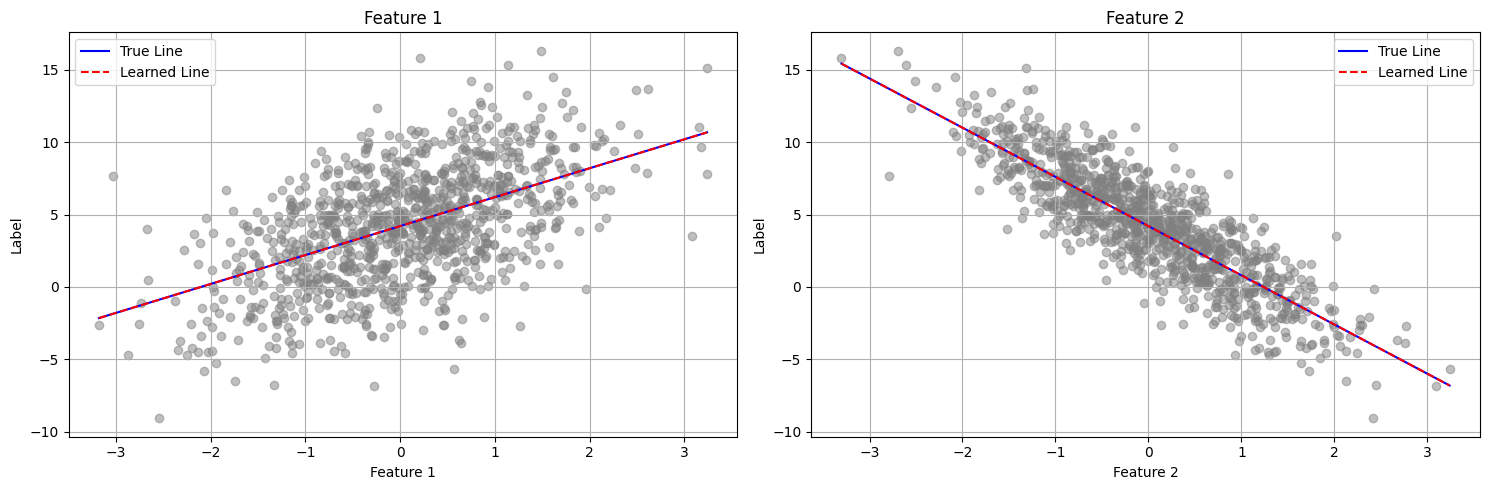

In [10]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Step 1: Generate Synthetic Data
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b noises"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape) # add noise
    return X, y.reshape(-1, 1)

# Given the weight and bias, generate input and labels randomly
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

print(f"There are {len(features)} examples.")

# Step 2: Create DataLoader
batch_size = 10
dataset = TensorDataset(features, labels)
data_iter = DataLoader(dataset, batch_size, shuffle=True)

# Step 3: Define the Model
class LinearRegressionScratch:
    def __init__(self, num_inputs):
        self.w = torch.normal(0, 0.01, (num_inputs, 1), requires_grad=True)
        self.b = torch.zeros(1, requires_grad=True)
    
    def forward(self, X):
        return torch.matmul(X, self.w) + self.b
    
# Step 4: Define the loss function
def squared_loss(y_hat, y):
    return ((y_hat - y) ** 2) / 2

# Step 5: Define the SGD Optimizer with parameters of model and learning rate
class SGD:
    def __init__(self, params, lr):
        self.params = params
        self.lr = lr
        
    def step(self):
        for param in self.params:
            param.data -= self.lr * param.grad.data
            
    def zero_grad(self):
        for param in self.params:
            if param.grad is not None:
                param.grad.zero_()
                
# Step 6: Training Function
def train(num_epochs, model, data_iter, loss_fn, optimizer):
    for epoch in range(num_epochs):
        for X, y in data_iter:
            # forward pass
            y_hat = model.forward(X)
            loss = loss_fn(y_hat, y).mean()
            
            # backward pass
            loss.backward()
            
            # Update param
            optimizer.step()
            optimizer.zero_grad()
        
        # print epoch training loss results
        with torch.no_grad():
            train_loss = loss_fn(model.forward(features), labels).mean()
            print(f"Epoch {epoch+1}, Loss {train_loss.item():.4f}")
            
# Step 7: Init andd train model
lr = 0.03
num_epochs = 3
model = LinearRegressionScratch(num_inputs=2)
optimizer = SGD([model.w, model.b], lr=lr)
train(num_epochs, model, data_iter, squared_loss, optimizer)

# Step 8: Evaluate and Compare True Parameters
print(f'True w: {true_w}, Learned w: {model.w.reshape(-1)}')
print(f'True b: {true_b}, Learned b: {model.b.item()}')

# Step 9: Visualize Results
# Each wegiht corresponds to a features, we represent the contribution of a particular feature while fixing other dientsion
with torch.no_grad():
    num_features = features.shape[1]  # Number of features
    fig, axs = plt.subplots(1, num_features, figsize=(15, 5))  # Subplots for each feature

    for i in range(num_features):
        ax = axs[i]
        x_line = torch.linspace(features[:, i].min(), features[:, i].max(), 100).reshape(-1, 1)
        
        # True line for this feature
        y_line_true = true_w[i] * x_line + true_b  # Removed `.item()` calls
        ax.plot(x_line.numpy(), y_line_true.numpy(), label="True Line", color='blue')

        # Learned line for this feature
        y_line_learned = model.w[i].item() * x_line + model.b.item()
        ax.plot(x_line.numpy(), y_line_learned.numpy(), label="Learned Line", linestyle='--', color='red')

        # Scatter plot for this feature vs. label
        ax.scatter(features[:, i].numpy(), labels.numpy(), color='gray', alpha=0.5)

        ax.set_title(f"Feature {i+1}")
        ax.set_xlabel(f"Feature {i+1}")
        ax.set_ylabel("Label")
        ax.legend()
        ax.grid()

    plt.tight_layout()
    plt.show()
